In [ ]:
Group Project

### A.1 Subreddit Selection

**Selected Subreddit:** `r/mealprepsunday`

We picked **r/mealprepsunday** because it’s a really active community where people share recipes, meal prep ideas, and helpful cooking tips. It’s a great place to see how users talk about food, healthy habits, and everyday cooking struggles or successes.

Plus, since our team loves cooking and trying out new meals, this subreddit matches our interests perfectly and makes the project more fun and relatable for us.

In [1]:
REDDIT_CLIENT_ID="DGjDIFhLQR-nntEnjDRDLw"
REDDIT_CLIENT_SECRET="0C3U0q9VdDfEqqqrlsGYr04mziJxDg"
REDDIT_AGENT="COMM337 social media data collector"

In [2]:
!pip install praw

In [2]:
import praw

In [3]:
from RedditCollector import RedditCollector

from datetime import datetime

import pandas as pd

ModuleNotFoundError: No module named 'RedditCollector'

In [4]:
rc = RedditCollector(client_id=REDDIT_CLIENT_ID,
                     client_secret=REDDIT_CLIENT_SECRET,
                     user_agent=REDDIT_AGENT)

NameError: name 'RedditCollector' is not defined

In [6]:
reddit_submissions = rc.collect_submission(subreddit='MealPrepSunday', by='top', limit=1000)

In [7]:
reddit_submissions['collected_time']

'2025-08-10 10:42:22'

In [8]:
df_submission = pd.DataFrame(reddit_submissions['submissions'])

In [9]:
df_submission.head()

,id,author,author_flair_text,title,text,upvote_ratio,score,num_comments,created_timestamp
0,e6yp6s,DynoMenace,None,"My roommate and I both meal prep, so we got this",,0.92,43057,1283,1.575639e+09
1,dber5u,Nifteroni-and-Cheese,None,"I know it’s not a lot, but this is my first da...",,0.92,31531,633,1.569864e+09
2,ewf25g,arctic_radar,None,Soup jars for lunch! Just add hot water and wa...,,0.97,29018,391,1.580429e+09
3,chbckc,EZMickey,None,We've all been there,,0.95,27587,132,1.563990e+09
4,8jq6he,rachelleeann17,None,I graduate in 3 days and had 12 meal swipes to...,,0.92,25270,796,1.526427e+09


In [10]:
df_submission['created_time'] = pd.to_datetime(df_submission['created_timestamp'], unit='s')

In [11]:
df_submission.sort_values(by = 'num_comments', ascending=False).head(5)  # sort by num_comments

,id,author,author_flair_text,title,text,upvote_ratio,score,num_comments,created_timestamp,created_time
779,1dmol7x,Auraeseal,None,What to use the 4th space for?,I recently got a few of these lunch boxes and ...,0.89,3307,1675,1.719156e+09,2024-06-23 15:24:10
0,e6yp6s,DynoMenace,None,"My roommate and I both meal prep, so we got this",,0.92,43057,1283,1.575639e+09,2019-12-06 13:23:02
30,6nfyk9,murder508,None,$2 1k Calorie meal,,0.91,12744,942,1.500126e+09,2017-07-15 13:35:32
7,1k1ojym,Educational-Month-63,None,I may have meal prepped a little too close to ...,My husband and I spent three days over the las...,0.97,22796,820,1.744926e+09,2025-04-17 21:42:03
4,8jq6he,rachelleeann17,None,I graduate in 3 days and had 12 meal swipes to...,,0.92,25270,796,1.526427e+09,2018-05-15 23:23:26


In [3]:
df_submission.to_csv('mealprepsunday_reddit_submission.csv', index = False)  # save the comments to a CSV file

NameError: name 'df_submission' is not defined

In [4]:
!pip install tqdm  # tqdm is a Python library that provides a fast, extensible progress bar for loops and other iterable objects.

In [5]:
from tqdm import tqdm  # Load progress bars

In [6]:
import pandas as pd

# Load your saved comments CSV
dfc = pd.read_csv('mealprepsunday_reddit_comments.csv')

# If the timestamp column exists, convert it
if 'created_timestamp' in dfc.columns:
    dfc['created_time'] = pd.to_datetime(dfc['created_timestamp'], unit='s')

print(dfc.head())

  comment_id submission_id      comment_author comment_author_flair_text  \
0    f9tztgm        e6yp6s  straight_to_10_jfc                       NaN   
1    f9u7xdv        e6yp6s     TrusMeImADoctor                       NaN   
2    f9utnno        e6yp6s    throwaway3921218                       NaN   
3    f9tzry8        e6yp6s       asianabsinthe                       NaN   
4    f9u7rtb        e6yp6s           SammyLuke                       NaN   

   comment_score                                       comment_text  \
0           4306  Rip your electric bill.\n\nHad these at family...   
1           1057  why not just get an actual fridge? one that wo...   
2            263  Electrician here. This is cool and it good way...   
3            314  Now get a vending machine and charge your room...   
4            276  On the bottom there is an evaporator coil that...   

   comment_created_timestamp comment_created_time         created_time  
0               1.575642e+09  2019-12-06 14

In [7]:
import pandas as pd

all_comments = []

# Loop through all submission IDs from your MealPrepSunday dataset
for submission_id in tqdm(df_submission.id):
    submission_comments = rc.collect_comment(submission_id=submission_id, limit=None)

    if submission_comments is not None:
        all_comments.extend(submission_comments['comments'])

NameError: name 'df_submission' is not defined

In [16]:
# Convert to DataFrame
dfc = pd.read_csv('mealprepsunday_reddit_comments.csv', index_col=0)

In [17]:
dfc = pd.read_csv('mealprepsunday_reddit_comments.csv')
print(dfc.columns)

Index(['comment_id', 'submission_id', 'comment_author',
       'comment_author_flair_text', 'comment_score', 'comment_text',
       'comment_created_timestamp', 'comment_created_time', 'created_time'],
      dtype='object')


In [18]:
# Convert timestamp to human-readable datetime
# Step 2 — Add human-readable time column
dfc['created_time'] = pd.to_datetime(dfc['comment_created_timestamp'], unit='s')

In [19]:
print(len(dfc.columns))
print(dfc.columns.tolist())

9
['comment_id', 'submission_id', 'comment_author', 'comment_author_flair_text', 'comment_score', 'comment_text', 'comment_created_timestamp', 'comment_created_time', 'created_time']


In [ ]:
# Rename columns to be descriptive
# Step 3 — Rename columns if needed
# dfc.columns = [
    'comment_id',
    'submission_id',
    'comment_author',
    'comment_author_flair_text',
    'comment_score',
    'comment_text',
    'comment_created_timestamp',
    'comment_created_time'
] # skip renaming since csv already saved with correct names

In [20]:
# Save to CSV
dfc.to_csv('mealprepsunday_reddit_comments.csv', index=False)

In [21]:
print(f"Saved {len(dfc)} comments to mealprepsunday_reddit_comments.csv")

Saved 42704 comments to mealprepsunday_reddit_comments.csv


In [22]:
# Extract authors from submissions and comments
submissions_authors = df_submission['author'].dropna().tolist()
comments_authors = dfc['comment_author'].dropna().tolist()

# Combine and get unique authors
all_authors = list(set(submissions_authors + comments_authors))

print(f"Total unique authors: {len(all_authors)}")

Total unique authors: 34056


In [25]:
all_authors = [a for a in all_authors if a not in (None, '[deleted]')]
all_authors = list(set(all_authors))  # keep unique

In [26]:
import pandas as pd
dfa = pd.DataFrame(dfaAuthor)
dfa.to_csv('mealprepsunday_reddit_authors_partial.csv', index=False)

In [28]:
from tqdm import tqdm
import pandas as pd
import time
import os

save_path = 'mealprepsunday_reddit_authors.csv'

# If restarting and partial file exists, load progress
dfaAuthor = []
processed_users = set()
if os.path.exists(save_path):
    existing_df = pd.read_csv(save_path)
    if 'username' in existing_df.columns:
        processed_users = set(existing_df['username'].dropna().unique())
    dfaAuthor = existing_df.to_dict('records')
    print(f"Resuming from {len(processed_users)} users already saved.")

# Filter authors to skip already processed ones
remaining_authors = [a for a in all_authors if a not in processed_users]

# Progress bar loop
for i, author in enumerate(tqdm(remaining_authors), start=1):
    try:
        user_info = rc.collect_user(username=author)
        if user_info is not None:
            dfaAuthor.append(user_info)
    except Exception as e:
        print(f"Error fetching user {author}: {e}")

    # Save progress every 500 users
    if i % 500 == 0:
        pd.DataFrame(dfaAuthor).to_csv(save_path, index=False)
        print(f"💾 Saved progress at {i} users.")


# Final save
pd.DataFrame(dfaAuthor).to_csv(save_path, index=False)
print(f"✅ Finished! Collected metadata for {len(dfaAuthor)} users.")


Resuming from 0 users already saved.


  1%|▏         | 500/34056 [02:27<5:40:33,  1.64it/s]

💾 Saved progress at 500 users.


  3%|▎         | 1000/34056 [07:22<5:34:42,  1.65it/s]

💾 Saved progress at 1000 users.


  4%|▍         | 1500/34056 [12:22<5:22:11,  1.68it/s]

💾 Saved progress at 1500 users.


  6%|▌         | 2001/34056 [17:17<5:23:25,  1.65it/s]

💾 Saved progress at 2000 users.


  7%|▋         | 2500/34056 [22:16<4:27:56,  1.96it/s]

💾 Saved progress at 2500 users.


  9%|▉         | 3000/34056 [27:12<5:45:27,  1.50it/s]

💾 Saved progress at 3000 users.


 10%|█         | 3500/34056 [32:11<5:34:53,  1.52it/s]

💾 Saved progress at 3500 users.


 12%|█▏        | 4000/34056 [37:06<5:16:18,  1.58it/s]

💾 Saved progress at 4000 users.


 13%|█▎        | 4501/34056 [42:06<4:03:55,  2.02it/s]

💾 Saved progress at 4500 users.


 15%|█▍        | 5000/34056 [47:00<4:05:04,  1.98it/s]

💾 Saved progress at 5000 users.


 16%|█▌        | 5500/34056 [52:00<3:50:47,  2.06it/s]

💾 Saved progress at 5500 users.


 18%|█▊        | 6000/34056 [56:57<4:48:21,  1.62it/s]

💾 Saved progress at 6000 users.


 19%|█▉        | 6500/34056 [1:01:56<5:00:00,  1.53it/s]

💾 Saved progress at 6500 users.


 21%|██        | 7000/34056 [1:06:56<4:43:13,  1.59it/s]

💾 Saved progress at 7000 users.


 22%|██▏       | 7500/34056 [1:11:57<4:54:58,  1.50it/s]

💾 Saved progress at 7500 users.


 23%|██▎       | 8000/34056 [1:16:52<4:11:45,  1.72it/s]

💾 Saved progress at 8000 users.


 25%|██▍       | 8500/34056 [1:21:52<4:20:10,  1.64it/s]

💾 Saved progress at 8500 users.


 26%|██▋       | 9001/34056 [1:26:48<3:31:32,  1.97it/s]

💾 Saved progress at 9000 users.


 28%|██▊       | 9501/34056 [1:31:48<3:19:26,  2.05it/s]

💾 Saved progress at 9500 users.


 29%|██▉       | 10000/34056 [1:36:47<4:26:29,  1.50it/s]

💾 Saved progress at 10000 users.


 31%|███       | 10500/34056 [1:41:48<4:10:19,  1.57it/s]

💾 Saved progress at 10500 users.


 32%|███▏      | 11000/34056 [1:46:48<4:18:16,  1.49it/s]

💾 Saved progress at 11000 users.


 34%|███▍      | 11500/34056 [1:51:48<3:56:09,  1.59it/s]

💾 Saved progress at 11500 users.


 35%|███▌      | 12000/34056 [1:56:47<3:18:34,  1.85it/s]

💾 Saved progress at 12000 users.


 37%|███▋      | 12501/34056 [2:01:47<3:42:07,  1.62it/s]

💾 Saved progress at 12500 users.


 38%|███▊      | 13001/34056 [2:06:43<3:32:29,  1.65it/s]

💾 Saved progress at 13000 users.


 40%|███▉      | 13500/34056 [2:11:42<2:57:02,  1.94it/s]

💾 Saved progress at 13500 users.


 41%|████      | 14000/34056 [2:16:42<2:48:43,  1.98it/s]

💾 Saved progress at 14000 users.


 43%|████▎     | 14501/34056 [2:21:43<3:17:15,  1.65it/s]

💾 Saved progress at 14500 users.


 44%|████▍     | 15000/34056 [2:26:38<2:58:23,  1.78it/s]

💾 Saved progress at 15000 users.


 46%|████▌     | 15500/34056 [2:31:38<2:53:05,  1.79it/s]

💾 Saved progress at 15500 users.


 47%|████▋     | 16001/34056 [2:41:25<1:05:53,  4.57it/s]  

💾 Saved progress at 16000 users.


 48%|████▊     | 16501/34056 [3:02:12<53:09,  5.50it/s]      

💾 Saved progress at 16500 users.


 50%|████▉     | 17001/34056 [3:03:34<49:43,  5.72it/s]  

💾 Saved progress at 17000 users.


 51%|█████▏    | 17501/34056 [3:08:25<2:46:07,  1.66it/s]

💾 Saved progress at 17500 users.


 53%|█████▎    | 18000/34056 [3:13:24<2:23:38,  1.86it/s]

💾 Saved progress at 18000 users.


 54%|█████▍    | 18501/34056 [3:18:20<2:38:43,  1.63it/s]

💾 Saved progress at 18500 users.


 56%|█████▌    | 19001/34056 [3:23:21<2:37:52,  1.59it/s]

💾 Saved progress at 19000 users.


 57%|█████▋    | 19501/34056 [3:28:20<2:33:56,  1.58it/s]

💾 Saved progress at 19500 users.


 59%|█████▊    | 20000/34056 [3:33:20<2:07:49,  1.83it/s]

💾 Saved progress at 20000 users.


 60%|██████    | 20501/34056 [3:38:21<2:21:42,  1.59it/s]

💾 Saved progress at 20500 users.


 62%|██████▏   | 21001/34056 [3:43:21<2:16:56,  1.59it/s]

💾 Saved progress at 21000 users.


 63%|██████▎   | 21501/34056 [3:48:15<1:45:10,  1.99it/s]

💾 Saved progress at 21500 users.


 65%|██████▍   | 22001/34056 [3:53:15<1:37:41,  2.06it/s]

💾 Saved progress at 22000 users.


 66%|██████▌   | 22500/34056 [3:58:11<2:02:31,  1.57it/s]

💾 Saved progress at 22500 users.


 68%|██████▊   | 23000/34056 [4:03:12<1:58:08,  1.56it/s]

💾 Saved progress at 23000 users.


 69%|██████▉   | 23500/34056 [4:08:06<1:12:51,  2.41it/s]

💾 Saved progress at 23500 users.


 70%|███████   | 24000/34056 [4:13:06<1:23:37,  2.00it/s]

💾 Saved progress at 24000 users.


 72%|███████▏  | 24500/34056 [4:18:04<1:33:09,  1.71it/s]

💾 Saved progress at 24500 users.


 73%|███████▎  | 25000/34056 [4:23:04<1:31:23,  1.65it/s]

💾 Saved progress at 25000 users.


 75%|███████▍  | 25501/34056 [4:28:00<1:30:33,  1.57it/s]

💾 Saved progress at 25500 users.


 76%|███████▋  | 26000/34056 [4:32:59<1:17:00,  1.74it/s]

💾 Saved progress at 26000 users.


 78%|███████▊  | 26500/34056 [4:37:58<1:08:15,  1.84it/s]

💾 Saved progress at 26500 users.


 79%|███████▉  | 27001/34056 [4:43:00<1:13:08,  1.61it/s]

💾 Saved progress at 27000 users.


 81%|████████  | 27500/34056 [4:47:59<1:15:51,  1.44it/s]

💾 Saved progress at 27500 users.


 82%|████████▏ | 28000/34056 [4:53:00<1:04:47,  1.56it/s]

💾 Saved progress at 28000 users.


 84%|████████▎ | 28500/34056 [4:58:00<59:33,  1.55it/s]  

💾 Saved progress at 28500 users.


 85%|████████▌ | 29000/34056 [5:03:00<54:22,  1.55it/s]  

💾 Saved progress at 29000 users.


 87%|████████▋ | 29500/34056 [5:08:00<52:48,  1.44it/s]  

💾 Saved progress at 29500 users.


 88%|████████▊ | 30000/34056 [5:13:00<43:32,  1.55it/s]  

💾 Saved progress at 30000 users.


 90%|████████▉ | 30500/34056 [5:17:54<29:25,  2.01it/s]

💾 Saved progress at 30500 users.


 91%|█████████ | 31000/34056 [5:22:54<26:56,  1.89it/s]

💾 Saved progress at 31000 users.


 92%|█████████▏| 31500/34056 [5:27:54<21:22,  1.99it/s]

💾 Saved progress at 31500 users.


 94%|█████████▍| 32000/34056 [5:32:55<18:27,  1.86it/s]

💾 Saved progress at 32000 users.


 95%|█████████▌| 32500/34056 [5:45:50<05:25,  4.78it/s]    

💾 Saved progress at 32500 users.


 97%|█████████▋| 33000/34056 [5:50:46<10:33,  1.67it/s]

💾 Saved progress at 33000 users.


 98%|█████████▊| 33500/34056 [5:55:46<05:31,  1.68it/s]

💾 Saved progress at 33500 users.


100%|█████████▉| 34001/34056 [6:00:47<00:27,  1.98it/s]

💾 Saved progress at 34000 users.


100%|██████████| 34056/34056 [6:01:19<00:00,  1.57it/s]

✅ Finished! Collected metadata for 32813 users.


### Only run the following codes:

In [5]:
# Install required packages
!pip install praw tqdm

In [18]:
# Imports
import praw
from RedditCollector import RedditCollector
from datetime import datetime
import pandas as pd
from tqdm import tqdm
import time
import os

In [19]:
# Set up Reddit API credentials
REDDIT_CLIENT_ID = "DGjDIFhLQR-nntEnjDRDLw"
REDDIT_CLIENT_SECRET = "0C3U0q9VdDfEqqqrlsGYr04mziJxDg"
REDDIT_AGENT = "COMM337 social media data collector"

# Initialize RedditCollector
rc = RedditCollector(
    client_id=REDDIT_CLIENT_ID,
    client_secret=REDDIT_CLIENT_SECRET,
    user_agent=REDDIT_AGENT
)

In [8]:
# For extracting unique authors (will need to run if recollecting metadata)

# Load saved data
df_submission = pd.read_csv('mealprepsunday_reddit_submission.csv')
dfc = pd.read_csv('mealprepsunday_reddit_comments.csv')

# Get authors from submissions and comments
submissions_authors = df_submission['author'].dropna().tolist()
comments_authors = dfc['comment_author'].dropna().tolist()

# Combine and filter
all_authors = list(set(submissions_authors + comments_authors))
all_authors = [a for a in all_authors if a not in (None, '[deleted]')]
print(f"Total unique authors: {len(all_authors)}")

NameError: name 'pd' is not defined

In [95]:
# Load CSV's for Analysis

df_submission = pd.read_csv('mealprepsunday_reddit_submission.csv')
df_comments = pd.read_csv('mealprepsunday_reddit_comments.csv')
df_authors = pd.read_csv('mealprepsunday_reddit_authors.csv')

print(df_submission.shape, dfc.shape, df_authors.shape)
print("Submissions:", df_submission.shape)
print("Comments:", df_comments.shape)
print("Authors:", df_authors.shape)

(891, 10) (42704, 9) (32813, 5)
Submissions: (891, 10)
Comments: (42704, 9)
Authors: (32813, 5)


In [57]:
!pip install nltk
!pip install wordcloud
!pip install textblob

import nltk 
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords 
import string # Import the string module to access punctuation characters
puncs = string.punctuation
from collections import Counter

In [58]:
# Part B
# Question 1 For all your collected submission text, what are the ten most popular words with
# and without stop words?

translator = str.maketrans('', '', string.punctuation)
sw = stopwords.words('english')
stemmer = PorterStemmer()
sw.append("looks")
sw.append("like")
sw.append("get")

def clean_text(text, stem = False):
    """Function to clean text by converting to lower case, removing punctuation, and stopwords. Returns a list of cleaned words.
    Optionally, stem the words if stem is set to True."""

    # lower case
    clean_text = text.lower()

    # remove punctuation
    clean_text = clean_text.translate(translator)

    # remove stopwords
    cleaned_words = []
    for word in clean_text.split():
        if word not in sw:
            if stem:  # If stem is True, stem the word
                word = stemmer.stem(word)
            cleaned_words.append(word)
    
    return cleaned_words

def clean_text_w_stopwords(text, stem = False):
    """Function to clean text by converting to lower case, removing punctuation, and stopwords. Returns a list of cleaned words.
    Optionally, stem the words if stem is set to True."""

    # lower case
    clean_text = text.lower()

    # remove punctuation
    clean_text = clean_text.translate(translator)

    # remove stopwords
    cleaned_words = []
    for word in clean_text.split():
            cleaned_words.append(word)
    
    return cleaned_words

In [59]:
#all_text = df_submission['text'].tolist()  # Convert the 'text' column to a list
all_text = df_submission['text'].dropna().astype(str).tolist()
all_text_string = ' '.join(all_text)  # Join all comments into a single string

cleaned_words = clean_text(all_text_string, stem = False) # Clean the comments string without stemming
word_count = Counter(cleaned_words)
print(word_count.most_common(10))  # Get the 10 most common words and their counts

cleaned_words_w_stopwords = clean_text_w_stopwords(all_text_string, stem = False)
word_count_w_stopwords = Counter(cleaned_words_w_stopwords)
print(word_count_w_stopwords.most_common(10))

[('chicken', 14), ('rice', 9), ('cheese', 7), ('got', 7), ('last', 6), ('meal', 6), ('prep', 6), ('made', 6), ('also', 6), ('mixed', 6)]
[('and', 60), ('i', 44), ('to', 34), ('the', 33), ('with', 32), ('a', 30), ('of', 23), ('for', 18), ('in', 17), ('it', 17)]


In [60]:
# Question 2 For all your collected first-level comment text, what are the ten most popular
# words with and without stop words?

all_text = df_comments['comment_text'].dropna().astype(str).tolist()
all_text_string = ' '.join(all_text)  # Join all comments into a single string

cleaned_words = clean_text(all_text_string, stem = False) # Clean the comments string without stemming
word_count = Counter(cleaned_words)
print(word_count.most_common(10))  # Get the 10 most common words and their counts

cleaned_words_w_stopwords = clean_text_w_stopwords(all_text_string, stem = False)
word_count_w_stopwords = Counter(cleaned_words_w_stopwords)
print(word_count_w_stopwords.most_common(10))




[('good', 3817), ('meal', 3030), ('make', 2500), ('food', 2469), ('great', 2373), ('one', 2223), ('prep', 2167), ('would', 2143), ('love', 2091), ('eat', 2028)]
[('the', 23172), ('i', 20094), ('a', 16836), ('and', 16021), ('to', 15346), ('you', 15108), ('of', 11178), ('this', 10494), ('for', 10234), ('it', 9448)]


In [98]:
#  3. Identify the five most influential submissions, where influence is defined as the
#  number of all comments the post has received.

df_comments[['comment_id','submission_id']]

df_sub_rank = df_comments.groupby('submission_id', as_index=False)['comment_id'].count()
df_sub_rank.sort_values(by='comment_id', ascending=False).head(5)

,submission_id,comment_id
8,1dmol7x,1247
22,1k1ojym,434
432,dber5u,299
16,1j2siko,270
860,sb3vlq,256


In [ ]:
# 4. Create a line chart to visualize the number of submissions over time.

In [62]:
!pip install matplotlib

In [63]:
import matplotlib.pyplot as plt  # Importing matplotlib's pyplot module for plotting
import pandas as pd  # Importing pandas library for data manipulation
import numpy as np

In [64]:
%matplotlib inline  # You might need to execute the following code to show plots in Jupyter notebooks

UsageError: unrecognized arguments: # You might need to execute the following code to show plots in Jupyter notebooks


In [85]:
def truncate_month(x):  #"2025-07-29" --> "2025"
    return x[:7]

In [86]:
df_time_subcount = df_submission.groupby('created_time', as_index = False)['id'].nunique()
df_time_subcount['total_submissions'] = np.arange(1, len(df_time_subcount) + 1)
df_time_subcount['new_created_time'] = df_time_subcount['created_time'].apply(truncate_month)
df_time_subcount

,created_time,id,total_submissions,new_created_time
0,2015-09-23 21:22:50,1,1,2015-09
1,2016-06-06 10:16:20,1,2,2016-06
2,2016-07-18 01:02:19,1,3,2016-07
3,2016-08-28 22:21:51,1,4,2016-08
4,2016-09-06 17:42:56,1,5,2016-09
...,...,...,...,...
886,2025-05-29 13:54:30,1,887,2025-05
887,2025-06-03 15:30:15,1,888,2025-06
888,2025-06-08 01:06:10,1,889,2025-06
889,2025-07-29 14:23:55,1,890,2025-07


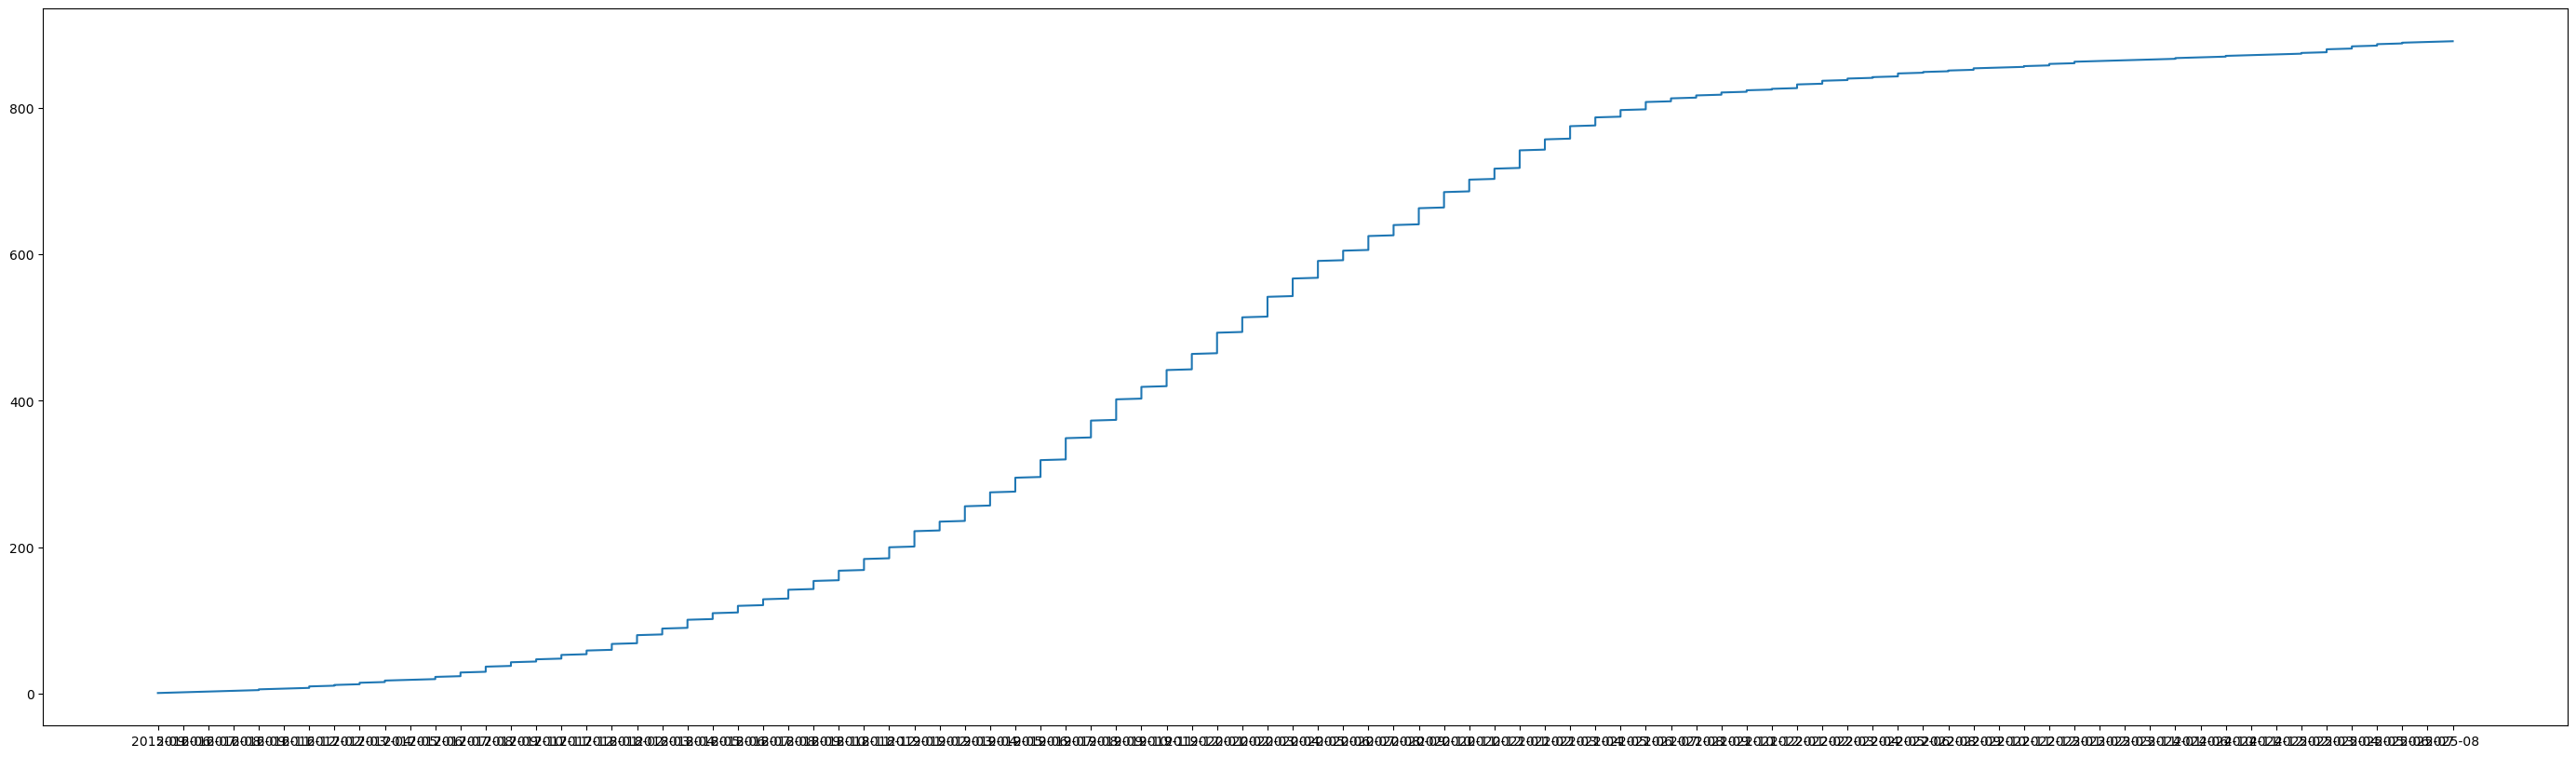

In [92]:
plt.figure(figsize=(35, 10), dpi = 100)
plt.plot(df_time_subcount['new_created_time'], df_time_subcount['total_submissions'])

In [10]:

# 5. Identify the three most active users in your dataset, based on the number of top-
#  level comments they have posted.


# using a helper function from the reddit collection notes page to find top-level comments


In [90]:
# This line of code retrieves all comments on the given submission

submission_comments = rc.collect_comment(submission_id='1mhr6kt', limit=None)


In [93]:
# C. [Word Cloud; 15 points] Create two word clouds from your collected dataset:

from wordcloud import WordCloud  # Import the WordCloud class from the wordcloud package
import matplotlib.pyplot as plt  # Import the pyplot module from matplotlib for plotting


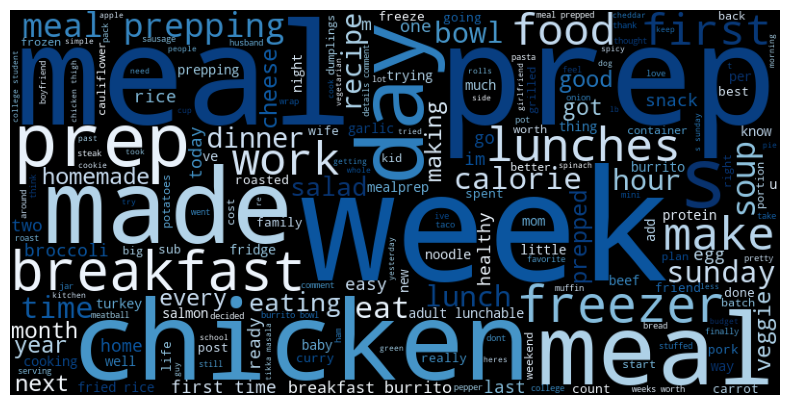

In [97]:
# 1. A word cloud based on the text of all collected submissions (including titles and
# main texts).

# prepare text
text1 = ' '.join(df_submission['title'].tolist())
text1 = text1.replace(',', ' ')

# Clean text with the `clean_text` function
text1_clean = clean_text(text1)  
text1_clean = ' '.join(text1_clean)  # Join the cleaned words into a single string

mywordcloud = WordCloud(width=800, height=400, background_color='black', colormap = 'Blues').generate(text1_clean)
plt.figure(figsize=(10,5))
plt.imshow(mywordcloud)
plt.axis('off')

plt.show()

In [21]:
submission_comments = rc.collect_comment(submission_id='1dmol7x', limit=None)
submission_comments

{'limit': None,
 'submission_id': '1dmol7x',
 'comments': [{'comment_id': 'l9wzhs5',
   'parent_id': '1dmol7x',
   'author': 'bossamemucho',
   'author_flair_text': None,
   'score': 6425,
   'text': '![gif](giphy|3oxOCqY7aKRESAP26s)',
   'created_timestamp': 1719157290.0},
  {'comment_id': 'l9wzcax',
   'parent_id': '1dmol7x',
   'author': 'rottenapple9',
   'author_flair_text': None,
   'score': 2951,
   'text': 'Fruit',
   'created_timestamp': 1719157234.0},
  {'comment_id': 'l9x4ruu',
   'parent_id': '1dmol7x',
   'author': 'cnthndlmyswg',
   'author_flair_text': None,
   'score': 169,
   'text': 'Nuts?',
   'created_timestamp': 1719159232.0},
  {'comment_id': 'l9wzf17',
   'parent_id': '1dmol7x',
   'author': 'YesWeHaveNoTomatoes',
   'author_flair_text': None,
   'score': 941,
   'text': 'Sauce\n\nEggs, or another protein that you want to eat in a small portion, like those sweet stewed beans or natto\n\nAnother veggie dish like a s seaweed salad or edamame or carrot sticks etc\n\

In [20]:
# 2. A second word cloud based on the first-level comments from the most influential
# submission identified in Question B.3.

submission_comments = rc.collect_comment(submission_id='1dmol7x', limit=None)

# prepare text
text2 = ' '.join(submission_comments['comment_text'].tolist())
text2 = text2.replace(',', ' ')

# Clean text with the `clean_text` function
text2_clean = clean_text(text2)  
text2_clean = ' '.join(text2_clean)  # Join the cleaned words into a single string

mywordcloud = WordCloud(width=800, height=400, background_color='white', colormap = 'reds').generate(text2_clean)
plt.figure(figsize=(10,5))
plt.imshow(mywordcloud)
plt.axis('off')

plt.show()

KeyError: 'comment_text'

In [13]:
# D. [Sentiment Analysis; 15 points] Using TextBlob, calculate the polarity and
# subjectivity scores for all first-level comments from the most influential submission
# identified in Question B.3, and answer the following questions.

!pip install textblob
from textblob import TextBlob  # Import the TextBlob class from the textblob package

In [17]:
# 1. What are the average polarity and subjectivity scores?


# needs to be first-level comments from most influencial
#submission_comments = rc.collect_comment(submission_id='1dmol7x', limit=None)

s = 'reddit collector sucks'
tb = TextBlob(s)
#tb = TextBlob(text2)
print(tb.sentiment)

Sentiment(polarity=-0.3, subjectivity=0.3)


In [ ]:
# 2. Visualize the polarity and subjectivity score distributions using histograms, where
# X-axis is the score and Y-axis is the comment count in the score bin. In total,
# there should be 2 histograms for this task.

def pola(s):
    tb = TextBlob(s)
    return tb.sentiment.polarity

def subjec(s):
    tb = TextBlob(s)
    return tb.sentiment.subjectivity

submission_comments["polarity"] = submission_comments["comment_text"].apply(pola)
submission_comments["subjectivity"] = submission_comments["comment_text"].apply(subjec)

submission_comments['polarity'].hist(bins = 20)

submission_comments['subjectivity'].hist(bins = 20)

In [ ]:
# 3. Based on the polarity scores, what are the most positive and negative comments?
# Why is the user happy/angry on the topic? If there are multiple comments with the
# same sentiment scores, please pick 2-3 comments among them.

most_positive_avg_polarity=submission_comments.groupby('submission_id',as_index=False)['polarity'].sort_values(by='polarity', ascending=False).head(1)
most_positive_avg_polarity

most_negative_avg_polarity=submission_comments.groupby('submission_id',as_index=False)['polarity'].sort_values(by='polarity').head(1)
most_negative_avg_polarity


